# EECE570 Project - Demonstration of a single Voronoi Tessellation for Grain Map Simulation


load the relevant modules. 

# User specify some parameters


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage.util import random_noise
from PIL import Image
%matplotlib inline
map_pixel_size = 512
resolution = 24e-6 # 24 micron 
map_dim= resolution*map_pixel_size # map dimension in meters 
map_size = (map_dim * 1000) ** 2 # map size in mm^2

print(f"[Info] Map size: {map_size} mm^2")


n = 100  # generate some random points 100 -2000, initial seed number
SNR = 10  # SNR

points = np.random.rand(n, 2)  
vor = Voronoi(points)
# assign a random value to each point
values = np.random.rand(n)
cmap = plt.get_cmap('jet')
polygons = []

[Info] Map size: 150.994944 mm^2


# Based on seed coordinates to generate voronoi tessellations. Assign colour value to patches

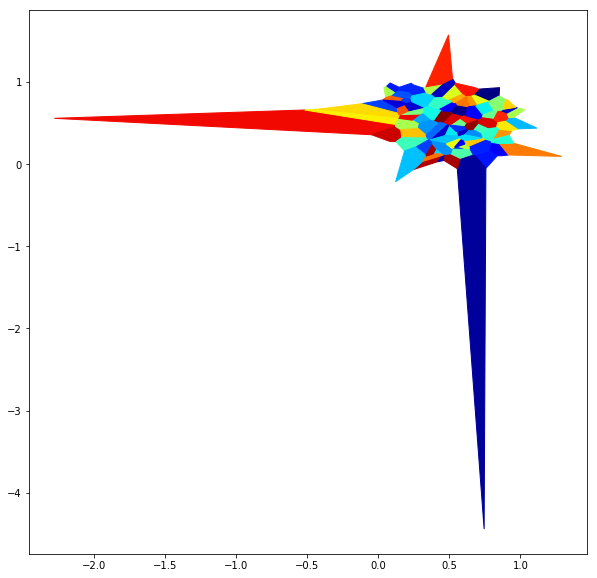

In [101]:


fig, ax = plt.subplots(figsize=(10, 10))
for i, region in enumerate(vor.regions):
    if not -1 in region:
        polygon = [vor.vertices[j] for j in region]
        polygons.append(polygon)
        ax.fill(*zip(*polygon), color=cmap(values[i-1]))

# Crop the unnecessary part

[Info] Grain Number: 41


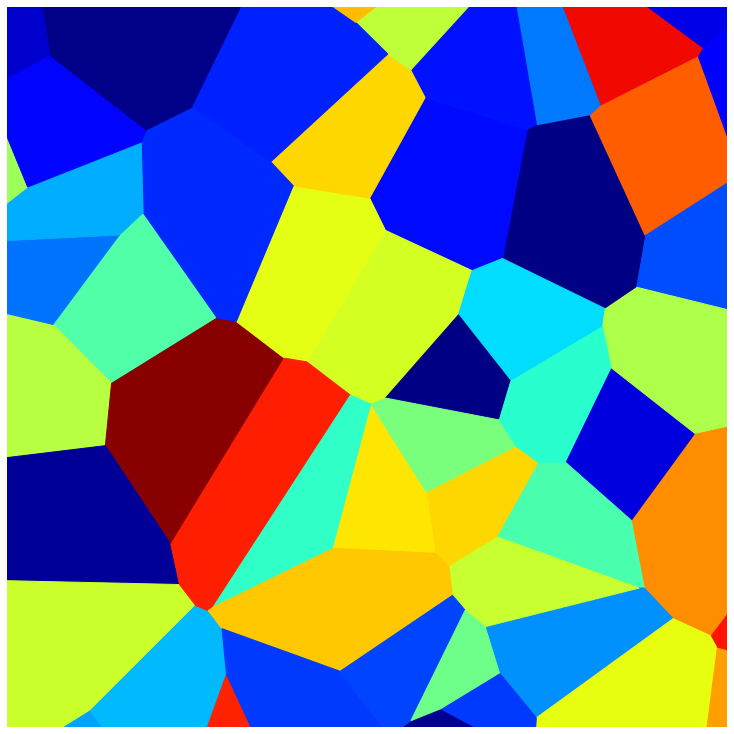

In [102]:
%matplotlib inline

vor = Voronoi(points)
# assign a random value to each point
values = np.random.rand(n)
cmap = plt.get_cmap('jet')
polygons = []

fig, ax = plt.subplots(figsize=(10, 10))
for i, region in enumerate(vor.regions):
    if not -1 in region:
        polygon = [vor.vertices[j] for j in region]
        polygons.append(polygon)
        ax.fill(*zip(*polygon), color=cmap(values[i-1]))
Trimming_Upper_Limit = 0.8
Trimming_Lower_limit = 0.2
ax.set_xlim([Trimming_Lower_limit, Trimming_Upper_Limit])
ax.set_ylim([Trimming_Lower_limit, Trimming_Upper_Limit])

ax.set_xticks([])
ax.set_yticks([])
Remaining_Centroid_Mask = (points[:,0]>= 0.2) & (points[:,0]<= 0.8) & (points[:,1] >= 0.2) & (points[:,1] <= 0.8)
number_of_centroids = np.count_nonzero(Remaining_Centroid_Mask)
print(f"[Info] Grain Number: {number_of_centroids}")
Centroid_X = points[:,0][Remaining_Centroid_Mask]
Centroid_Y = points[:,1][Remaining_Centroid_Mask]
new_points = np.column_stack((Centroid_X, Centroid_Y))

ax.set_axis_off()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

fig.savefig('grain_map.png', dpi=map_pixel_size/10, bbox_inches='tight', pad_inches=0, format='png', transparent=True, facecolor='none')


# Show the Centroids on grain map

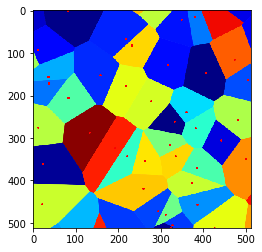

In [124]:
ax.scatter(new_points[:, 0], new_points[:, 1], c='red', marker='o', s=30, zorder=5)
fig.savefig('grain_map_centroids.png', dpi=map_pixel_size/10, bbox_inches='tight', pad_inches=0, format='png', transparent=True, facecolor='none')
centroids_on_image = 'grain_map_centroids.png'


image = Image.open(centroids_on_image)
plt.imshow(image)

plt.show()

# Add noise to grain map

[INFO] mean grain size is: 4.443962417624551 mm^2
[Info] SNR: 11.883720697022998 dB


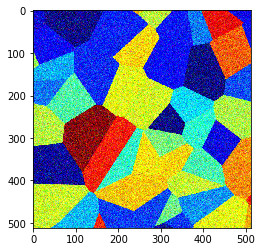

In [126]:
vor = Voronoi(points)

areas = []

for i, region in enumerate(vor.regions):

    polygon = [vor.vertices[j] for j in region]
        # calculate the area of the polygon using Shoelace formula
    x = [p[0] for p in polygon]
    y = [p[1] for p in polygon]
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    areas.append(area)
areas= np.sort(areas)
areas = areas[int(n*0.2):int(n*0.7)]
areas = np.array(areas)/0.6/0.6*map_dim*map_dim*1e6

mean_grain_size = np.mean(areas)
print(f"[INFO] mean grain size is: {mean_grain_size} mm^2")


image = plt.imread('grain_map.png')[:, :, :3]  # keep only the first three channels



signal = np.mean(image) # add Gaussian noise to the image
std = signal / (10**(SNR/20))
noisy_image = random_noise(image, mode='gaussian', var=std**2)

# get the SNR
noise = np.std(noisy_image - image)
snr = 20 * np.log10(signal / noise)
print(f"[Info] SNR: {snr} dB")


plt.imsave('noisy_grain_map.png', noisy_image)
saved_noisy_image = Image.open('noisy_grain_map.png')
plt.imshow(saved_noisy_image)

plt.show()

